In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


Mean Absolute Error (MAE): 0.7560
Mean Squared Error (MSE): 0.7997
Root Mean Squared Error (RMSE): 0.8943
R-squared Score: 0.9049
Cross-Validated RMSE: 0.9986 ± 0.1859


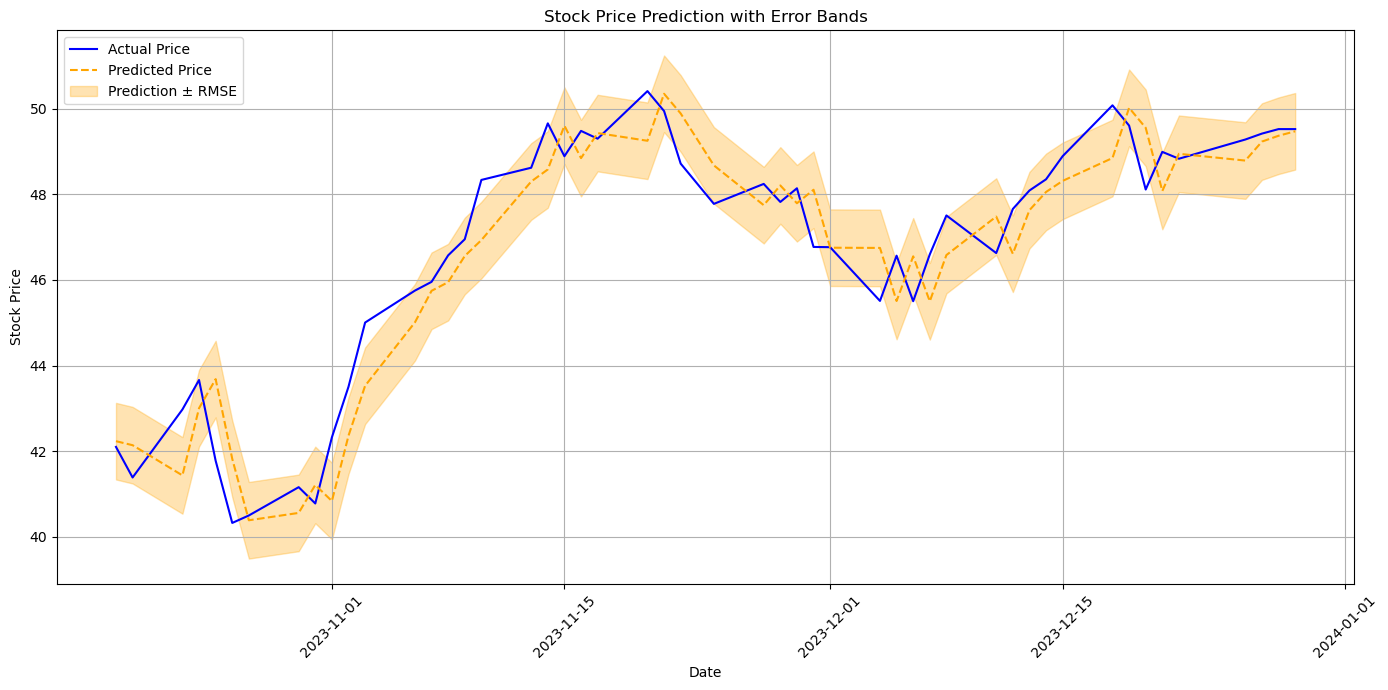

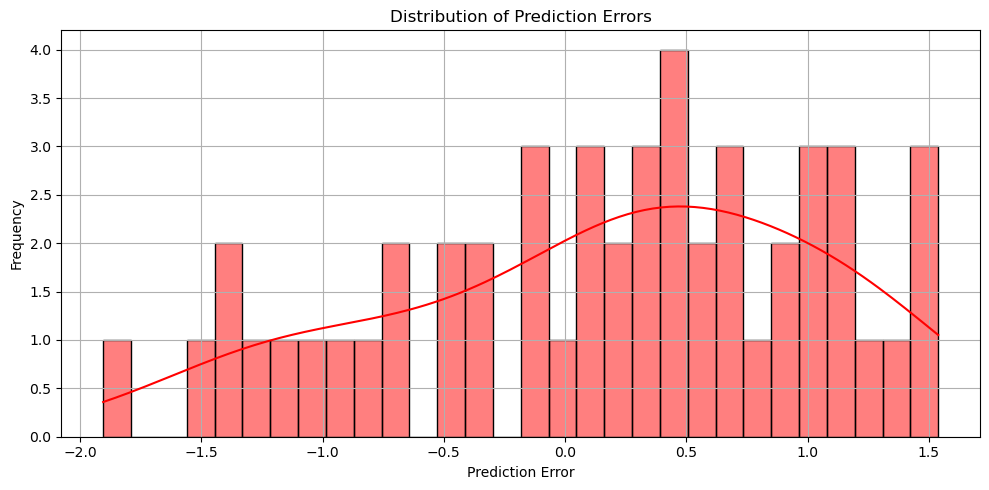

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# NVIDIA stock data from 01/01/2023 to 01/01/2024
ticker_symbol = 'NVDA'
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-01-01')


stock_data['Previous_Close'] = stock_data['Close'].shift(1)
stock_data = stock_data.dropna()


X = stock_data[['Previous_Close']]
y = stock_data['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")


from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_mse)
print(f"Cross-Validated RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--', color='orange')


plt.fill_between(y_test.index, y_pred - rmse, y_pred + rmse, color='orange', alpha=0.3, label='Prediction ± RMSE')


plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with Error Bands')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.figure(figsize=(10, 5))
errors = y_test - y_pred
sns.histplot(errors, bins=30, kde=True, color='red')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()